In [ ]:

from IPython.display import display, Image
from IPython.display import SVG

# Q_2 : SPC pattern recognition classification <br>
> In this study , the MLP classifier is implemented. The study includes , 
- Data standadizing and preprocessing 
- choosing validate set 
- Defining Network Structure (Using Keras API functions) 
- Hyperparameter Tuning 
- Test Result 

> Because of the sparse nature of the dataset, in order to not be biased or overfitted, the choiceof regularization shoild be taken care of very thoroughly. So , the main focus of hyperparameter tiuning in this excercise is regularization. 

In [ ]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import backend
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense , Input , Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


# Data reading and PreProcessing 
> Data was read in pandas DaytaFrame and Standardized. Technically, for small dataset the normalization process should be done before spliting data to train and test. Here as the train and test set are given , normalizatio of the test set was done based on the parameter of the train set. The Stand() function takes care of standardization. 
> 20 percent of training set was randomly chosen as a **validate set**. From model section in Sklearn package this job could be dne. 

In [ ]:
def stand(dataset):
    dataset = (dataset-dataset.mean())/dataset.std()
    return dataset

training_Data = pd.read_csv("SPC-Training.csv", header = None)
testing_Data = pd.read_csv("SPC-Testing.csv", header = None)

X_training_Data = training_Data.iloc[:, 0:10].values
Y_training_Data = training_Data.iloc[:, 10:17].values
Rowtraingdata = len(X_training_Data)

X_training_Data = stand(X_training_Data)



X_testing_Data = stand(testing_Data.iloc[:, 0:10].values)
Y_testing_Data = testing_Data.iloc[:, 10:17].values
Rowtestingdata = len(X_testing_Data)

> As the tensorboard graph depicts, The based MLP network contains 5 fully connected layers with 50% dropout rate and relu activation function. "Softmax" activation function is employed for last layer classification. SGD optimizer with the learning rate of 0.1 and cross entropy loss function define the model compilers. 
In order to develop the Network, Keras sequential model is employed which is a high level of tensorflow API function, however it does not have that much flexibility one could use, still it covers the report and training as far as our need. 

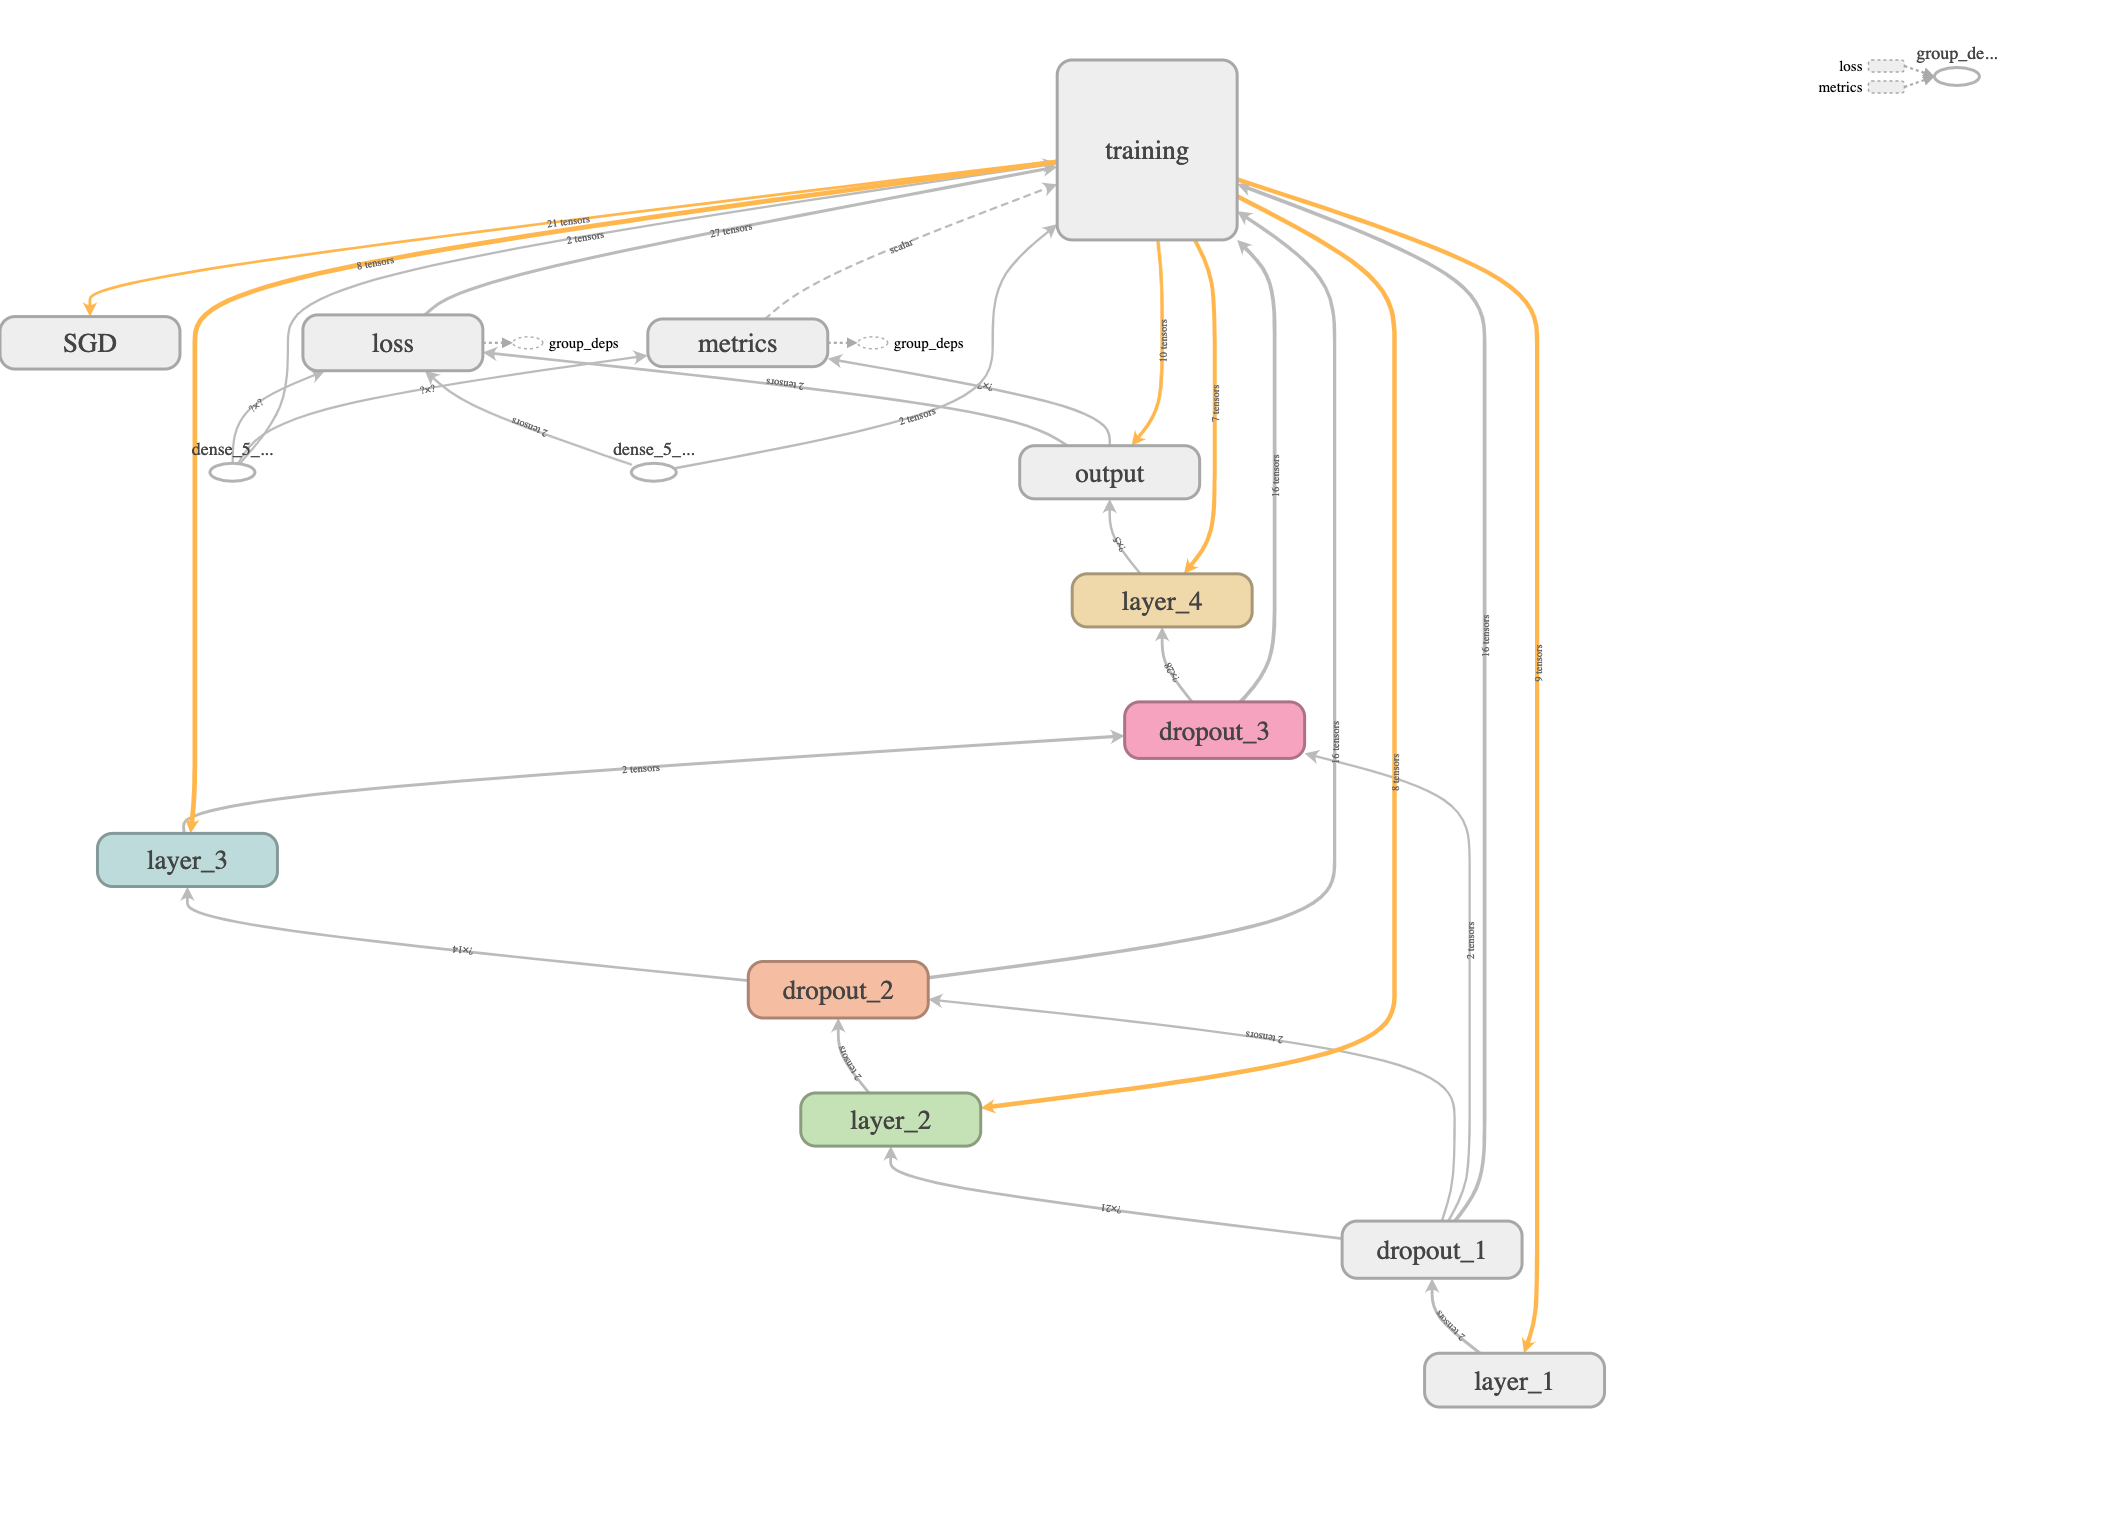

In [ ]:
display(Image(filename='graph.png'))

In [ ]:
model = Sequential()


with tf.name_scope("layer_1"):
    model.add(Dense(21, use_bias=True, 
                init=tf.contrib.layers.xavier_initializer() , activation = "relu" , input_shape=(10,)))

model.add(Dropout(.5) )
with tf.name_scope("layer_2"):
    model.add(Dense(14, use_bias=True, 
                init= tf.contrib.layers.xavier_initializer() , activation = "relu"))
model.add(Dropout(.5))
with tf.name_scope("layer_3"):
    model.add(Dense(28 ,  use_bias=True ,
                init= tf.contrib.layers.xavier_initializer() , activation = "relu"))
model.add(Dropout(.25))
with tf.name_scope("layer_4"):
    model.add(Dense(5 ,  use_bias=True, 
                init= tf.contrib.layers.xavier_initializer() , activation = "relu"))  
with tf.name_scope("output"):
    model.add(Dense(7 ,  use_bias=True,  
                init= tf.contrib.layers.xavier_initializer() , activation = "softmax"))


model.compile(optimizer=SGD(0.1) ,loss='categorical_crossentropy' , metrics=['accuracy'])

#tf.summary.scalar('Loss', loss)
#tf.summary.scalar('Acc', metrics)
#summary_op = tf.summary.merge_all()
tb_callback = keras.callbacks.TensorBoard(
    log_dir="./graphs",
    write_graph=True
)
#es = EarlyStopping(monitor='loss', min_delta=1)


trained_model = model.fit(X_train,y_train,batch_size = 64, 
                          epochs = 500 , callbacks=[tb_callback] , validation_data=(X_val,y_val))


> At the first step, the model trained for 500 epoches with minibatch of 64. Graphs below shows the result of trend of loss and accuracy over traing and validate set. 

**Loss function and Acuuracy for trainng and validate set for 5_layer network with Dropout**

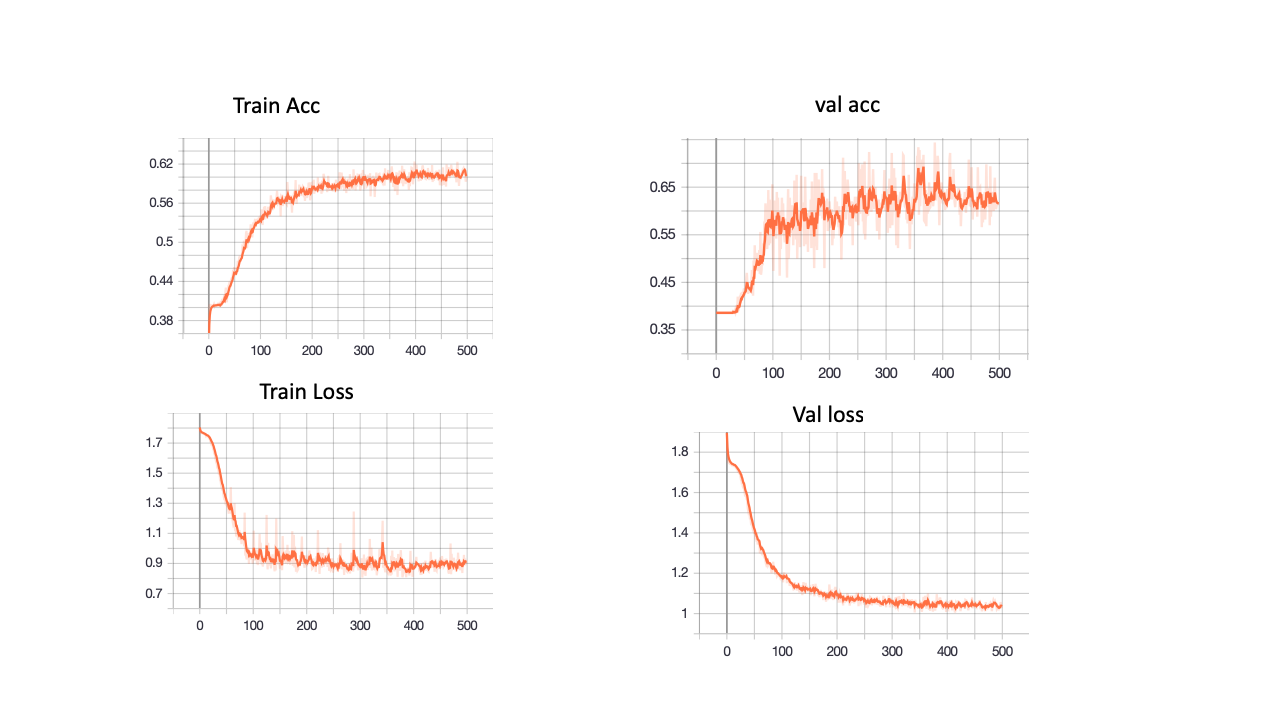

In [ ]:
display(Image(filename='5_layer_withDropOut.png'))

# Obervation of the 5-layer MLP :
- The accuracy is not very acceptable 
- After 300th epoch , the algorithm hardly learn anything 

> Based on the observations above however we the last epoch accuracy and loss, the trend shows from which epoch the algorithm does not learn anything. 
So, For other algorithms, the number of epoches will be reduced to 300. 

# Searching for another Network 
The graphs below are the trained results over training and validate for a 5-layer fully connceted network without having any dropout regulizer layer and as it clearly shows literally after around 300th epoch , it did not learn anything. 
 
- The reported accuracy over train and validate set are 100% and 85% respectively, However the generalization error would be given by test set. The generalization error is reported  89% . For further study , it would be suggested to have the search over the best learning rate as well as the other optimizers. Also, adding regulizer coiuld be of the benefit to have the cross validation sett error more smooth and less variance however we might loose some level of accuracy ,


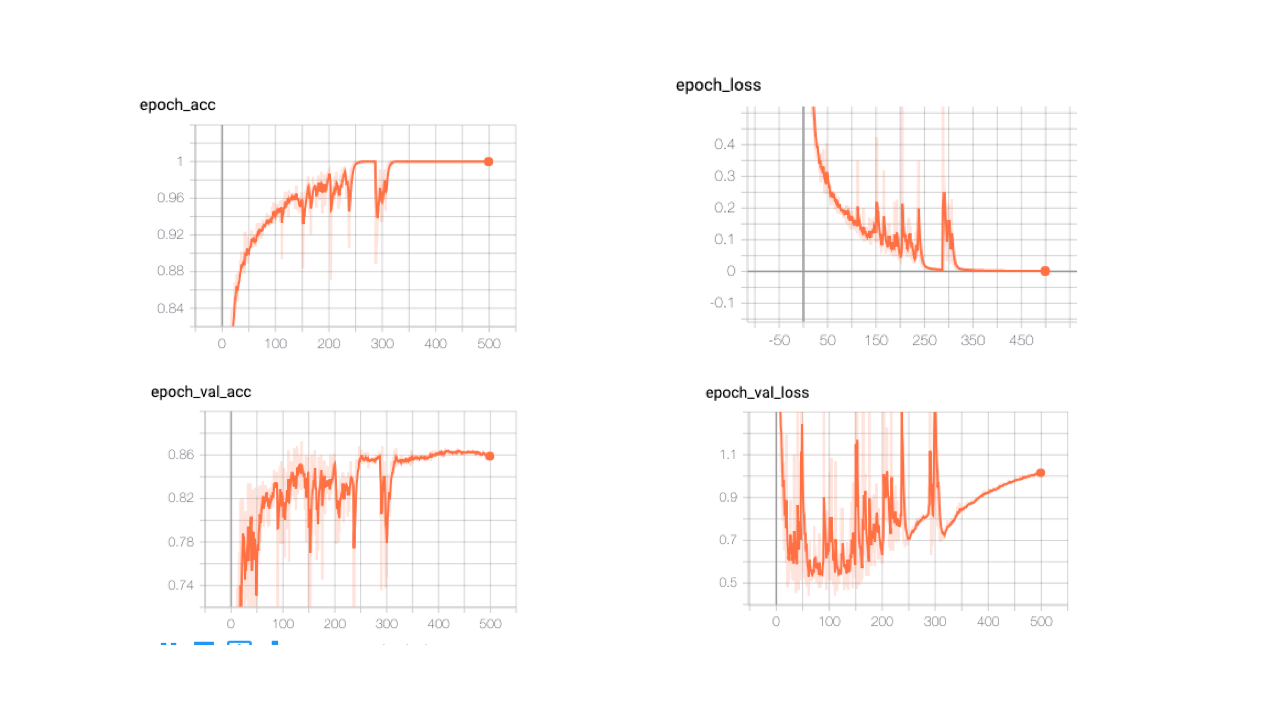

In [ ]:
display(Image(filename='5_layer_withoutDropOut.png'))

In [ ]:
test_evaluation = model.evaluate(X_testing_Data , Y_testing_Data )

# Network with Regularizer (penalized by rate of 0.01)
>In the next step, Instead of having drop out , the regularizer term was added to each layer amnd the reported result illustrated in graphs below is not promissing; the learning algorithmm is biased.  The reported accuracy is 63% on training and 52% on validating set which is not accpetable. 

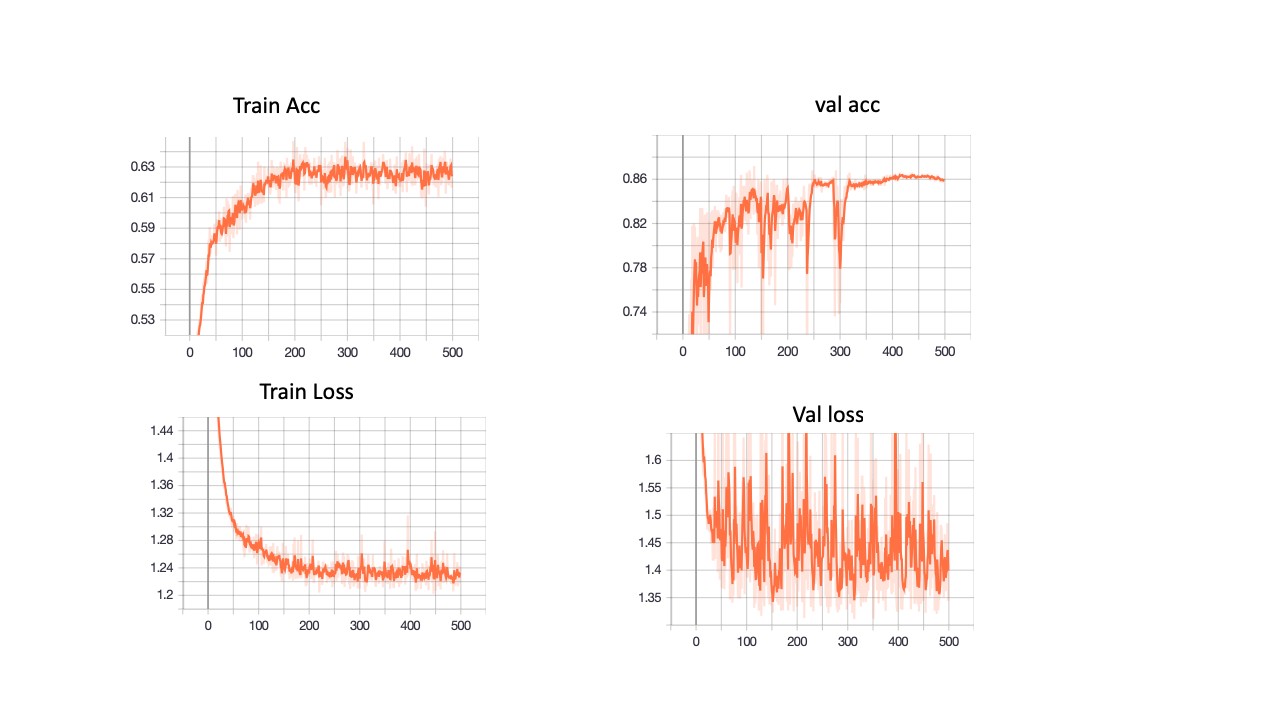

In [ ]:
display(Image(filename='5_layer_withRegularization.png'))

# Conclusion; 
In this SPC pattern recognistion study 3 different 5_layer networks were into the test. simple fulluy conncted, with drop out layer and another one without drop out but with regularizer. Among them , the simple fully conncted 5-layer outperform with 100 % of accuracy over training set, 85 percent over Validate set and 89% for test set. 